In [133]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt



In [134]:
#import other packages along the work
import pandas as pd
from sklearn import model_selection

In [135]:
from sklearn import svm

In [136]:
from sklearn import metrics

In [137]:
pd.read_csv?

In [138]:
data = pd.read_csv('~/desktop/train_data_label.csv', header=None)

In [139]:
data.head()
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679
155,0.096954,0.104114,0.129995,0.120837,0.096787,0.122211,0.139523,0.125896,0.166721,0.140888,...,0.134281,0.139502,0.137652,0.144018,0.142585,0.142585,0.147111,0.146961,0.146184,3.0
156,0.120660,0.121951,0.106975,0.151167,0.200470,0.097305,0.110613,0.124963,0.144020,0.115947,...,0.168379,0.161845,0.122256,0.096178,0.094329,0.094510,0.106879,0.150990,0.218653,2.0
157,0.091374,0.136733,0.127285,0.096850,0.106514,0.144915,0.115551,0.089738,0.118095,0.131321,...,0.140063,0.125685,0.105914,0.093900,0.098724,0.107543,0.103889,0.090168,0.087490,2.0
158,0.117788,0.106581,0.107678,0.121217,0.125707,0.142990,0.133872,0.123312,0.149970,0.198102,...,0.132343,0.126823,0.093065,0.083223,0.084958,0.083679,0.084177,0.088942,0.109900,2.0
159,0.089404,0.099978,0.212427,0.093207,0.103728,0.095315,0.120039,0.095794,0.109594,0.093217,...,0.086574,0.088420,0.086574,0.086783,0.084898,0.084898,0.086335,0.087200,0.089780,4.0


In [140]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [141]:
data_ = data.as_matrix()

In [142]:
data_shuffled = data_.copy()

In [143]:
np.random.shuffle(data_shuffled)

In [144]:
data_hold_out = data_shuffled[:round(data_shuffled.shape[0]/10)]
data_to_use = data_shuffled[round(data_shuffled.shape[0]/10):]

In [145]:
X1 = data_to_use[:, :-1]
y1 = data_to_use[:, -1]

In [146]:
X_hold_out = data_hold_out[:, :-1]
y_hold_out = data_hold_out[:, -1]

In [147]:
# Now let's try to use DataFrame only
data_random = data.sample(frac=1).reset_index(drop=True)

In [148]:
X2 = data_random.iloc[:, :-1]
y2 = data_random.iloc[:, -1]

In [149]:
lsvc = svm.LinearSVC()

In [150]:
lsvc.fit(X=X2, y=y2)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [151]:
lsvc.predict(X_new)

array([ 2.,  2.,  4.,  1.,  4.,  2.,  4.,  1.,  4.,  4.,  3.,  1.,  2.,
        3.,  1.,  2.,  4.,  2.,  1.,  1.,  1.,  2.,  3.,  3.,  4.,  3.,
        3.,  4.,  1.,  3.,  1.,  1.,  2.,  4.,  4.,  3.,  3.,  2.,  3.,  2.])

In [152]:
svc = svm.LinearSVC()

In [153]:
from sklearn import neighbors

In [154]:
# accuracy of LinearSVC
lsvc = svm.LinearSVC()
score = model_selection.cross_val_score(estimator=lsvc, X=X1, y=y1, scoring='accuracy', cv=10)
score.mean()

0.99230769230769234

In [155]:
# test on the hold_out
lsvc.fit(X=X1, y=y1)
y_hold_out_pred = lsvc.predict(X_hold_out)
y_hold_out_pred

array([ 1.,  2.,  2.,  2.,  3.,  1.,  3.,  2.,  2.,  3.,  3.,  3.,  4.,
        4.,  4.,  1.])

In [156]:
data_new = pd.read_csv('~/desktop/test_data.csv', header=None)
X_new = data_new.as_matrix()

In [157]:
y_pred = lsvc.predict(X_new)
y_pred

array([ 2.,  2.,  4.,  1.,  4.,  2.,  4.,  1.,  4.,  4.,  3.,  1.,  2.,
        3.,  1.,  2.,  4.,  2.,  1.,  1.,  1.,  2.,  3.,  3.,  4.,  3.,
        3.,  4.,  1.,  3.,  1.,  1.,  2.,  4.,  4.,  3.,  3.,  2.,  3.,  2.])

In [158]:
np.savetxt(fname='pred_result.csv', X=y_pred, delimiter=',')

In [159]:
y_hold_out

array([ 1.,  2.,  2.,  2.,  3.,  1.,  3.,  2.,  2.,  3.,  3.,  3.,  4.,
        4.,  4.,  2.])

In [160]:
metrics.confusion_matrix(y_pred=y_hold_out_pred, y_true=y_hold_out)

array([[2, 0, 0, 0],
       [1, 5, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 3]])

In [161]:
metrics.accuracy_score(y_pred=y_hold_out_pred, y_true=y_hold_out)

0.9375

In [162]:
score.mean()

0.99230769230769234

In [163]:
# accuracy of SVC
svc_ = svm.SVC()
score = model_selection.cross_val_score(estimator=svc_, X=X1, y=y1, scoring='accuracy', cv=10)
score.mean()

0.37518315018315018

In [164]:
knn1 = neighbors.KNeighborsClassifier(n_neighbors=13)

In [165]:
knn2 = neighbors.KNeighborsClassifier

In [166]:
# accuracy of knn, n=20
score1 = model_selection.cross_val_score(estimator=knn1, X=X1, y=y1, scoring='accuracy', cv=10)
score1.mean()

0.99166666666666659

In [167]:
# Scores of knn with 1~30 neighbors, 13 is the best.
Scores = []
for n in range(1, 31):
    knn_ = neighbors.KNeighborsClassifier(n_neighbors=n)
    score_mean = model_selection.cross_val_score(estimator=knn_, X=X, y=y, scoring='accuracy', cv=10).mean()
    Scores.append(score_mean)
   


In [168]:
Scores

[1.0,
 0.99375000000000002,
 0.99375000000000002,
 0.98750000000000004,
 0.98750000000000004,
 0.98750000000000004,
 0.98750000000000004,
 0.98750000000000004,
 0.98750000000000004,
 0.98750000000000004,
 0.98750000000000004,
 0.98750000000000004,
 0.98750000000000004,
 0.98124999999999996,
 0.98124999999999996,
 0.98124999999999996,
 0.98124999999999996,
 0.98124999999999996,
 0.98124999999999996,
 0.98124999999999996,
 0.98124999999999996,
 0.98124999999999996,
 0.98124999999999996,
 0.97499999999999998,
 0.98124999999999996,
 0.96875,
 0.96875,
 0.96875,
 0.96875,
 0.96875]

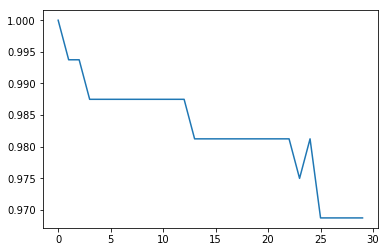

In [169]:
%matplotlib inline
plt.plot(Scores)